<a href="https://colab.research.google.com/github/Ferrariagustinpablo/Statistic-related-Python/blob/main/A_B_Hypothesis_testing_of_mean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [ ]:
link = 'https://assets.datacamp.com/production/repositories/1646/datasets/2751adce60684a03d8b4132adeadab8a0b95ee56/AB_testing_exercise.csv'

ab_test_results = pd.read_csv(link)

ab_test_results.head()

,uid,country,gender,spent,purchases,date,group,device
0,11115722,MEX,F,1595,5,2016-03-08,GRP B,I
1,11122053,USA,M,498,2,2017-07-14,GRP B,I
2,11128688,USA,F,2394,6,2017-09-17,GRP A,I
3,11130578,USA,F,1197,3,2017-11-30,GRP A,I
4,11130759,ESP,M,1297,3,2018-01-10,GRP B,A


In [ ]:
ab_test_results.group.unique()

array(['GRP B', 'GRP A'], dtype=object)

In [ ]:
# Confirm the size the groups are similar
results = ab_test_results.groupby('group').agg({'uid': pd.Series.nunique}) 
print(results)

         uid
group       
GRP A  23009
GRP B  22874


In [ ]:
# Find the unique users in each group 
results = ab_test_results.groupby(by=['group', 'device', 'gender']).agg({'uid': pd.Series.nunique}) 

# Find the overall number of unique users using "len" and "unique"
unique_users = len(ab_test_results.uid.unique())

# Find the percentage in each group
results = results / unique_users * 100
print(results)

                           uid
group device gender           
GRP A A      F       12.239827
             M       12.795589
      I      F       12.542772
             M       12.568925
GRP B A      F       12.553669
             M       12.499183
      I      F       12.283417
             M       12.516618


# EDA

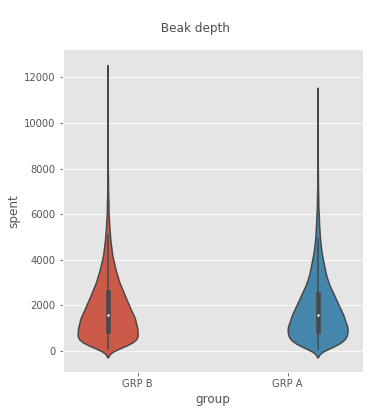

In [ ]:
# Create bee swarm plot for beak depth

g = sns.catplot(kind='violin',data=ab_test_results, x='group', y='spent', hue='group')
g.fig.suptitle("\n Beak depth", y= 1.09, alpha=0.7)

plt.show()

In [ ]:
# Function of ecdf for pandas series.

def ecdf(data):
    """Compute ECDF for a pandas series"""
    # Number of data points: n
    n = data.shape[0]

    # x-data for the ECDF: x
    x = data.sort_values()

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

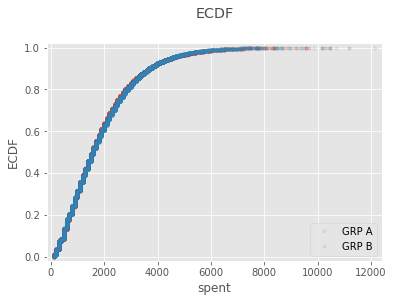

In [ ]:
# Compute ECDFs
xa, ya = ecdf(ab_test_results[ab_test_results.group == 'GRP A']['spent'])
xb, yb = ecdf(ab_test_results[ab_test_results.group == 'GRP B']['spent'])

plt.plot(xa, ya, marker='.', linestyle='none', alpha=0.1)
plt.plot(xb, yb, marker='.', linestyle='none', alpha=0.1)
plt.margins(0.02)
plt.title('ECDF', y= 1.09, alpha=0.7)
plt.xlabel('spent')
plt.ylabel('ECDF')
plt.legend(('GRP A', 'GRP B'), loc='lower right')

# Show the plot
plt.show()

# We want to test the hypothesis that both lengths have the same mean, but not necessarily the same distribution.

In [ ]:
grp_a = ab_test_results[ab_test_results.group == 'GRP A']['spent']
grp_b = ab_test_results[ab_test_results.group == 'GRP B']['spent']

In [ ]:
empirical_diff_means = np.mean(grp_b) - np.mean(grp_a)

# Compute mean of all test results
mean_spent = ab_test_results['spent'].mean()

# Generate shifted arrays
a_shifted = grp_a - np.mean(grp_a) + mean_spent
b_shifted = grp_b - np.mean(grp_b) + mean_spent

In [ ]:
# Bootstrap replicate functions

def bootstrap_replicate_1d(data, func):
  """Generate bootstrap replicate of 1D data"""
  bs_sample = np.random.choice(data, len(data))
  return func(bs_sample)

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

In [ ]:
# Compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_a = draw_bs_reps(a_shifted, np.mean, size=10000)
bs_replicates_b = draw_bs_reps(b_shifted, np.mean, size=10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_replicates_b - bs_replicates_a

# Compute and print p-value: p
p = np.sum(bs_replicates >= empirical_diff_means) / len(bs_replicates)
print('p-value =', p)


p-value = 0.3307


There is a 33% chance of observing a difference of mean as equal or higher than the observed one. 

There is no strong statistical inference that determines spendings has been changed.